# 🎯 O que é o Plotly

O Plotly é uma biblioteca de visualização de dados interativa.
Isso significa que, diferente de Matplotlib ou Seaborn, você pode explorar o gráfico com zoom, hover (mostrar valores) e seleção de áreas.

* Possui duas APIs principais:
 * plotly.express (px) → simples e rápido.
 * plotly.graph_objects (go) → mais flexível e detalhado.

* Funciona em notebooks, arquivos HTML e pode ser integrado ao Dash (biblioteca específica) para criar dashboards.

#🧰 Instalação e Importação

Antes de usar, precisamos instalar (o plotly não vem pré-instalado) e importar as bibliotecas.

In [ ]:
!pip install plotly --quiet

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

# 🧱 Anatomia do Plotly Express

A estrutura básica para criar um gráfico com plotly.express é:

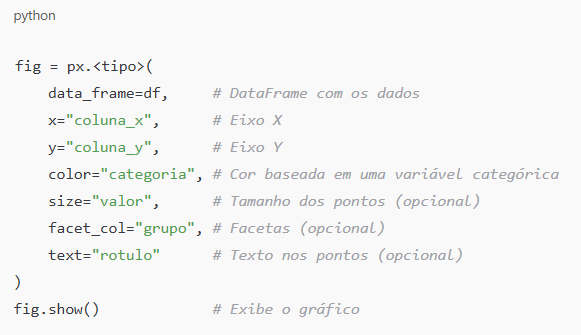

In [ ]:
# Dataframe de exemplo
x = [10, 15, 20, 25, 30, 35, 40]
y = [20, 24, 28, 32, 36, 40, 44]
df = pd.DataFrame({
    "X": x,
    "Y": y,
    "grupo": ["A","A","B","B","A","B","A"]
})
df

,X,Y,grupo
0,10,20,A
1,15,24,A
2,20,28,B
3,25,32,B
4,30,36,A
5,35,40,B
6,40,44,A


In [ ]:
fig = px.scatter(df, x="X", y="Y", color="grupo", size="Y",
                 title="Scatter interativo")
fig.show()

💡 Dica: Depois de criar, você pode personalizar com update_layout e update_traces.

# 📊 Tipos de gráfico mais comuns

#### Categóricos

#####🟤 Barplot

In [ ]:
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})

In [ ]:
# soma total de vendas por produto
df_total = df_bar.groupby("produto", as_index=False)["vendas"].sum()

In [ ]:
df_total.head(5)

,produto,vendas
0,Produto A,122
1,Produto B,123
2,Produto C,127
3,Produto D,108


In [ ]:
fig = px.bar(
    df_total,
    x="produto", y="vendas"
)

fig.show()

#####🟤 Barplot agrupado

In [ ]:
# Criando um DataFrame exemplo
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})

Barras são ótimas para comparações categóricas.

In [ ]:
df_bar.head(5)

,produto,loja,vendas
0,Produto C,Loja 1,78
1,Produto D,Loja 1,52
2,Produto A,Loja 1,65
3,Produto B,Loja 1,74
4,Produto C,Loja 2,49


In [ ]:
# Criando o gráfico interativo
fig = px.bar(
    df_bar,
    x="produto",
    y="vendas",
    color="loja",              # Agrupa por loja
    barmode="group",           # Barras agrupadas
)

fig.show()

#####🟤 Barplot horizontalizado

In [ ]:
# Criando o DataFrame
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})


In [ ]:
df_bar.head(5)

,produto,loja,vendas
0,Produto C,Loja 1,78
1,Produto D,Loja 1,52
2,Produto A,Loja 1,65
3,Produto B,Loja 1,74
4,Produto C,Loja 2,49


In [ ]:
# Barplot horizontal
fig = px.bar(
    df_bar,
    x="vendas",
    y="produto",
    color="loja",
    orientation="h",  # 🔄 Barras na horizontal
    barmode="group",  # Agrupadas por loja
)

fig.show()

#####🟤 Barplot proporcionado

In [ ]:
# Dados
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})


In [ ]:
# Calculando percentual
totais = df_bar.groupby("produto", as_index=False)["vendas"].transform("sum")
df_bar["percent"] = df_bar["vendas"] / totais * 100

In [ ]:
df_bar.head(5)

,produto,loja,vendas,percent
0,Produto C,Loja 1,78,61.417323
1,Produto D,Loja 1,52,48.148148
2,Produto A,Loja 1,65,53.278689
3,Produto B,Loja 1,74,60.162602
4,Produto C,Loja 2,49,38.582677


In [ ]:
# Gráfico
fig = px.bar(
    df_bar,
    x="produto",
    y="percent",
    color="loja",
    barmode="stack"
)

fig.show()

#####🟤 Barplot empilhado

In [ ]:
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})

In [ ]:
df_bar.head(5)

,produto,loja,vendas
0,Produto C,Loja 1,78
1,Produto D,Loja 1,52
2,Produto A,Loja 1,65
3,Produto B,Loja 1,74
4,Produto C,Loja 2,49


In [ ]:
fig = px.bar(
    df_bar,
    x="produto", y="vendas", color="loja",
    barmode="stack"
)

fig.show()

> Dica: quer horizontal? troque para x="vendas", y="produto" e adicione orientation="h"

#####🟤 Barplot empilhado proporcionado

In [ ]:
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})

In [ ]:
# calcula o total por produto e a % de cada loja dentro do produto (sem apply)
totais = df_bar.groupby("produto")["vendas"].transform("sum")
df_bar["percent"] = df_bar["vendas"] / totais * 100

In [ ]:
df_bar.head(5)

,produto,loja,vendas,percent
0,Produto C,Loja 1,78,61.417323
1,Produto D,Loja 1,52,48.148148
2,Produto A,Loja 1,65,53.278689
3,Produto B,Loja 1,74,60.162602
4,Produto C,Loja 2,49,38.582677


In [ ]:
fig = px.bar(
    df_bar,
    x="produto", y="percent", color="loja",
    barmode="stack"
)

fig.show()

#####🔴 Pie Char (Gráfico de Pizza)

Mostra proporções de cada categoria. Bom para ver distribuição percentual.

In [ ]:
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})

In [ ]:
# soma total de vendas por produto
df_total = df_bar.groupby("produto", as_index=False)["vendas"].sum()

In [ ]:
df_total.head(5)

,produto,vendas
0,Produto A,122
1,Produto B,123
2,Produto C,127
3,Produto D,108


In [ ]:
fig = px.pie(df_total,
             names="produto",
             values="vendas"
             )
fig.show()

> Plotly Express aplica automaticamente um fundo cinza-azulado em gráficos cartesianos como os gráficos de barras, mas para px.pie() o padrão é fundo branco.


#####🔴 Donut Chart (Gráfico de Rosca)

Variação do Pie Chart, com um “buraco” no meio. Mais moderno visualmente.

In [ ]:
df_bar = pd.DataFrame({
    "produto": ["Produto C", "Produto D", "Produto A", "Produto B"] * 2,
    "loja": ["Loja 1"] * 4 + ["Loja 2"] * 4,
    "vendas": [78, 52, 65, 74, 49, 56, 57, 49]
})

In [ ]:
# soma total de vendas por produto
df_total = df_bar.groupby("produto", as_index=False)["vendas"].sum()

In [ ]:
df_total.head(5)

,produto,vendas
0,Produto A,122
1,Produto B,123
2,Produto C,127
3,Produto D,108


In [ ]:
fig = px.pie(df_total,
             names="produto",
             values="vendas",
             hole=0.4
             )
fig.show()

#####🟣 Treemap

Mostra proporção com retângulos proporcionais. Útil para muitas categorias e hierarquias.

In [ ]:
df_treemap = pd.DataFrame({
    "Região": ["América", "América", "América", "Europa", "Europa", "Ásia", "Ásia", "Ásia"],
    "País": ["Brasil", "EUA", "México", "Alemanha", "França", "China", "Japão", "Índia"],
    "Vendas": [500, 800, 300, 600, 400, 900, 700, 500]
})

In [ ]:
df_treemap.head(5)

,Região,País,Vendas
0,América,Brasil,500
1,América,EUA,800
2,América,México,300
3,Europa,Alemanha,600
4,Europa,França,400


In [ ]:
fig = px.treemap(
    df_treemap,
    path=["Região", "País"],
    values="Vendas"
)
fig.show()

#####🟣 Sunburst Chart

Parecido com o treemap, mas circular. Bom para dados hierárquicos (categoria → subcategoria).

In [ ]:
df_sunburst = pd.DataFrame({
    "Continente": ["América", "América", "América", "Europa", "Europa", "Ásia", "Ásia", "Ásia"],
    "País": ["Brasil", "EUA", "México", "Alemanha", "França", "China", "Japão", "Índia"],
    "Cidade": ["São Paulo", "Nova York", "Cidade do México", "Berlim", "Paris", "Pequim", "Tóquio", "Nova Délhi"],
    "População": [22, 19, 21, 3.6, 11, 21.5, 37, 30]  # em milhões
})

In [ ]:
df_sunburst.head(5)

,Continente,País,Cidade,População
0,América,Brasil,São Paulo,22.0
1,América,EUA,Nova York,19.0
2,América,México,Cidade do México,21.0
3,Europa,Alemanha,Berlim,3.6
4,Europa,França,Paris,11.0


In [ ]:
fig = px.sunburst(
    df_sunburst,
    path=["Continente", "País", "Cidade"],
    values="População"
)
fig.show()

#####⚫ Funnel Chart (Funil)

Mostra etapas de um processo e como valores caem

In [ ]:
df_funnel = pd.DataFrame({
    "Etapa": ["Visitantes", "Leads", "Oportunidades", "Propostas", "Vendas"],
    "Quantidade": [1000, 600, 350, 200, 120]
})

In [ ]:
df_funnel.head(5)

,Etapa,Quantidade
0,Visitantes,1000
1,Leads,600
2,Oportunidades,350
3,Propostas,200
4,Vendas,120


In [ ]:
fig = px.funnel(
    df_funnel,
    x="Quantidade",
    y="Etapa"
)
fig.show()

#### Relacionais

#####🔵 Scatterplot

O scatter é usado para visualizar relações entre duas variáveis numéricas.

In [ ]:
np.random.seed(42)
n = 120
df_scatter = pd.DataFrame({
    "gasto": np.random.gamma(2., 500, n).round(2),
    "satisfacao": (60 + 0.02*np.random.gamma(2., 500, n) + np.random.randn(n)*5).clip(0,100),
    "segmento": np.random.choice(["A", "B", "C"], n, p=[.4,.4,.2]),
})

In [ ]:
df_scatter.head(5)

,gasto,satisfacao,segmento
0,1196.84,70.234235,A
1,747.23,84.033297,B
2,691.14,85.136344,A
3,691.15,61.697754,A
4,2324.86,93.403943,B


In [ ]:
fig = px.scatter(df_scatter,
                 x="gasto",
                 y="satisfacao",
                 color="segmento",
                 size="gasto"
                 )
fig.show()

#####🟢 Line Chart

O gráfico de linhas é ideal para séries temporais ou evolução ao longo de uma dimensão.

In [ ]:
rng = pd.date_range("2024-01-01", periods=60, freq="D")
df_line = pd.DataFrame({
    "data": rng,
    "site_A": (100 + np.cumsum(np.random.randn(len(rng))*2)).round(1),
    "site_B": (80  + np.cumsum(np.random.randn(len(rng))*2)).round(1),
})

In [ ]:
df_line.head(5)

,data,site_A,site_B
0,2024-01-01,103.2,79.7
1,2024-01-02,103.1,80.7
2,2024-01-03,104.6,78.6
3,2024-01-04,109.7,77.9
4,2024-01-05,110.7,77.5


In [ ]:
fig = px.line(df_line,
              x="data",
              y=["site_A","site_B"]
              )

fig.show()

#### Distributivos

#####🟡 Histplot

Compare distribuições por grupo.

In [ ]:
np.random.seed(1)
df_hist = pd.DataFrame({
    "valor": np.r_[np.random.normal(50,8,200), np.random.normal(65,6,180)],
    "grupo": ["Controle"]*200 + ["Tratado"]*180
})

In [ ]:
df_hist.head(5)

,valor,grupo
0,62.994763,Controle
1,45.105949,Controle
2,45.774626,Controle
3,41.416251,Controle
4,56.923261,Controle


In [ ]:
fig = px.histogram(df_hist,
                   x="valor"
                   )
fig.show()

##### 🟠 Boxplot

Excelente para comparar distribuições entre categorias.

In [ ]:
np.random.seed(2)
df_box = pd.DataFrame({
    "curso": np.repeat(["A","B","C","D"], 60),
    "nota":  np.r_[np.random.normal(70,7,60),
                   np.random.normal(75,5,60),
                   np.random.normal(68,6,60),
                   np.random.normal(80,4,60)].clip(0,100)
})

In [ ]:
df_box.head(5)

,curso,nota
0,A,67.082695
1,A,69.606132
2,A,55.046627
3,A,81.481896
4,A,57.445951


In [ ]:
fig = px.box(df_box,
             x="curso",
             y="nota"
             )

fig.show()

#### Matriciais

##### ⚪ Heatmap

Padrões, redundâncias e colinearidade.

In [ ]:
# Criar DataFrame com dados categóricos e valores
dados = {
    "Loja 1": [323, 301, 545, 261],
    "Loja 2": [285, 338, 291, 608]
}
tabela = pd.DataFrame(dados, index=["Produto A", "Produto B", "Produto C", "Produto D"])

In [ ]:
tabela.head(5)

,Loja 1,Loja 2
Produto A,323,285
Produto B,301,338
Produto C,545,291
Produto D,261,608


In [ ]:
# Criar Heatmap
fig = px.imshow(
    tabela
)

fig.show()

# 🎨 Personalização detalhada do Gráfico

In [ ]:
# Reprodutibilidade
np.random.seed(42)

# Dimensões
regioes = ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]
categorias = ["Eletrônicos", "Móveis", "Vestuário"]
produtos = {
    "Eletrônicos": ["Celular", "Notebook", "Tablet"],
    "Móveis": ["Mesa", "Cadeira", "Armário"],
    "Vestuário": ["Camisa", "Calça", "Tênis"]
}
meses = pd.date_range("2024-01-01", periods=6, freq="MS").strftime("%b/%Y").tolist()

# Geração de dados
dados = []
for reg in regioes:
    for cat in categorias:
        for prod in produtos[cat]:
            for mes in meses:
                vendas = np.random.randint(50, 500)
                preco_medio = np.random.randint(100, 3000)
                receita = vendas * preco_medio
                margem = round(np.random.uniform(0.1, 0.4), 2)
                dados.append([reg, cat, prod, mes, vendas, preco_medio, receita, margem])

df = pd.DataFrame(dados, columns=[
    "Região", "Categoria", "Produto", "Mês", "Vendas", "Preço Médio", "Receita", "Margem"
])

In [ ]:
df.head(5)

,Região,Categoria,Produto,Mês,Vendas,Preço Médio,Receita,Margem
0,Norte,Eletrônicos,Celular,Jan/2024,152,960,145920,0.16
1,Norte,Eletrônicos,Celular,Feb/2024,121,1738,210298,0.23
2,Norte,Eletrônicos,Celular,Mar/2024,264,430,113520,0.24
3,Norte,Eletrônicos,Celular,Apr/2024,422,230,97060,0.11
4,Norte,Eletrônicos,Celular,May/2024,307,2491,764737,0.35


In [ ]:
base = df.groupby("Categoria", as_index=False)["Receita"].sum()

In [ ]:
base.head(5)

,Categoria,Receita
0,Eletrônicos,38800110
1,Móveis,34915168
2,Vestuário,40191112


### 📏 Título Principal

* **Função**: Define o título principal do gráfico.
* **Código**: fig.update_layout(title=..., title_x=..., title_font=...)
* **Principais parâmetros**:
 * title → texto do título.
 * title_x → alinhamento horizontal (0 = esquerda, 0.5 = centro, 1 = direita).
 * title_font → dict com size, family, color.

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base, x="Categoria", y="Receita")

# Configuração de layout
fig.update_layout(
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56")
)
fig.show()

### 📏 Título do Eixo X

* **Função**: Ajusta o título do eixo X.
* **Código**: fig.update_layout(xaxis_title=..., xaxis_title_font=...)
* **Principais parâmetros**:
 * xaxis_title → texto do título.
 * xaxis_title_font → dict com size, family, color

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base,
             x="Categoria",
             y="Receita")

# Configuração de layout
fig.update_layout(
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333")
)

fig.show()

### 📏 Título do Eixo Y

* **Função**: Ajusta o título do eixo Y.
* **Código:** fig.update_layout(yaxis_title=..., yaxis_title_font=...)
* **Principais parâmetros**:
  * yaxis_title → texto do título.
  * yaxis_title_font → dict com size, family, color.

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base,
             x="Categoria",
             y="Receita")

# Configuração de layout
fig.update_layout(
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333")
)

fig.show()

### 📋 Legenda

* **Função**: Controla título, posição e orientação da legenda.
* **Código:** fig.update_layout(legend_title=..., legend=..., legend_orientation=...)
* **Principais parâmetros**:
  * legend_title → texto do título.
  * legend_orientation → 'h' ou 'v'.
  * legend → dict com x, y, xanchor, yanchor

In [ ]:
# Agrupar por Categoria e Produto, somando a Receita
base_filtrada = df.query(" Categoria == 'Eletrônicos'").groupby(["Categoria", "Produto"], as_index=False)["Receita"].sum()

In [ ]:
base_filtrada.head(5)

,Categoria,Produto,Receita
0,Eletrônicos,Celular,14514546
1,Eletrônicos,Notebook,10196021
2,Eletrônicos,Tablet,14089543


In [ ]:
# Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base_filtrada,
             x="Categoria",
             y="Receita",
            color="Produto",  # Diferencia pelo produto
)

# Configuração de layout
fig.update_layout(
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto"
)

fig.show()

### 📌 Limites dos eixos

* **Função**: define o intervalo visível de X e Y (mínimo e máximo).
* **Código:** fig.update_xaxes(range=[min, max]), fig.update_yaxes(range=[min, max])max])
* **Principais parâmetros**:
  * range → lista com [min, max].
  * autorange="reversed" → inverte o sentido do eixo.
  * (eixos categóricos): range não é comum — prefira filtrar os dados; quando usado, considera posições/ordem das categorias.

In [ ]:
# Maior valor da receita
max_receita = base_filtrada["Receita"].max()

In [ ]:
max_receita

14514546

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base_filtrada,
             x="Categoria",
             y="Receita",
            color="Produto",  # Diferencia pelo produto
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto"
)

# Personalizar eixo Y
fig.update_yaxes(range=[0, max_receita * 1.10])

fig.show()


### 📌 Marcações dos eixos

* **Função**: Personaliza a aparência e o comportamento das marcas dos eixos (ticks) e seus rótulos.
* **Código:** fig.update_xaxes(...) e fig.update_yaxes(...)
* **Principais parâmetros**:
    * tickmode → "auto", "linear" ou "array" (personalizado).
    * tickvals / ticktext → valores e textos dos rótulos (quando tickmode="array").
    * tickformat → formatação numérica (ex.: ",.0f", ".2f", ",.0%").
    * tickprefix / ticksuffix → prefixo/sufixo de rótulo (ex.: R$ , %).
    * tickangle → rotação do texto do rótulo (graus).
    * ticks → estilo da marca ("outside", "inside").
    * tickfont → fonte dos rótulos (dict(size=..., family=..., color=...)).
    * showticklabels → exibe/oculta rótulos (True/False).

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base_filtrada,
             x="Categoria",
             y="Receita",
            color="Produto",  # Diferencia pelo produto
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto"
)

# Personalizar eixo X
fig.update_xaxes(
    tickmode="array", # modo personalizado
    tickvals=base_filtrada["Categoria"], # valores (categorias existentes)
    ticktext=[c.upper() for c in categorias],  # rótulos exibidos
    tickangle=0, # rotação (0°, 45°, 90°...)
    ticks="outside",
    tickfont=dict(size=12, color="#333")
)

# Personalizar eixo Y
fig.update_yaxes(
    range=[0, max_receita * 1.10],
    tickprefix="R$ ", # prefixo nos valores
    tickformat=",.0f",  # separador de milhar, sem casas decimais
    ticks="outside",  # marcas para fora
    tickfont=dict(size=12, color="#333")
)

fig.show()

### 📌 Escalas dos eixos

* **Função**: define a forma como os valores são distribuídos no eixo (linear, logarítmica ou outras transformações).
* **Código:** fig.update_xaxes(type="linear") e fig.update_yaxes(type="log")
* **Principais parâmetros**: tipo pode ser:
  * type → "linear", "log", "date", "category", "multicategory".
  * dtick → espaçamento fixo entre ticks.
  * exponentformat → formato de expoentes em escala logarítmica ("none", "e", "E", "SI", "B", "power").
  * showexponent → mostra ou oculta expoente ("all", "first", "last", "none").

In [ ]:
  # Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base_filtrada,
             x="Categoria",
             y="Receita",
            color="Produto",  # Diferencia pelo produto
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto"
)

# Personalizar eixo X
fig.update_xaxes(
    tickmode="array",
    tickvals=base_filtrada["Produto"].unique(),
    tickangle=45,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category"  # força a leitura como categórico
)

# Personalizar eixo Y
fig.update_yaxes(
    range=[0, max_receita * 1.10],
    tickprefix="R$ ", # prefixo nos valores
    tickformat=",.0f",  # separador de milhar, sem casas decimais
    ticks="outside",  # marcas para fora
    tickfont=dict(size=12, color="#333")
)

fig.show()

### 🎯 Tamanho da figura

* **Função**: ajusta a largura e altura da figura para melhorar a visualização e o encaixe em relatórios ou apresentações.
* **Código:** fig.update_layout(width=..., height=...)
* **Parâmetros:**
  * width → largura da figura em pixels.
  * height → altura da figura em pixels.

In [ ]:
  # Exemplo de implementação

# Criar gráfico de barras empilhadas
fig = px.bar(base_filtrada,
             x="Categoria",
             y="Receita",
            color="Produto",  # Diferencia pelo produto
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto",
    width=900,    # largura em pixels
    height=500    # altura em pixels
)

# Personalizar eixo X
fig.update_xaxes(
    tickmode="array",
    tickvals=base_filtrada["Produto"].unique(),
    tickangle=45,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category"  # força a leitura como categórico
)

# Personalizar eixo Y
fig.update_yaxes(
    range=[0, max_receita * 1.10],
    tickprefix="R$ ", # prefixo nos valores
    tickformat=",.0f",  # separador de milhar, sem casas decimais
    ticks="outside",  # marcas para fora
    tickfont=dict(size=12, color="#333")
)

fig.show()

### 📊 Linhas de grade

* **Função**: Adiciona ou remove linhas de grade no gráfico para facilitar a leitura dos valores.
* **Código:** update_xaxes(showgrid=True, ...) e update_yaxes(showgrid=True, ...)
* **Principais parâmetros**:
 * showgrid → True ou False → ativa/desativa a grade.
 * gridcolor → cor da linha da grade (ex.: "lightgray", "#ccc").
 * gridwidth → espessura da linha da grade (número inteiro ou float).
 * griddash → estilo da linha (ex.: "dash", "dot", "longdash").
 * gridwidth + gridcolor podem ser combinados para personalizar.

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras
fig = px.bar(
    base_filtrada,
    x="Categoria",
    y="Receita",
    color="Produto"
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto",
    width=900,
    height=500
)

# Personalizar eixo X
fig.update_xaxes(
    tickmode="array",
    tickvals=base_filtrada["Categoria"].unique(),
    ticktext=[c.upper() for c in base_filtrada["Categoria"].unique()],
    tickangle=0,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category",
    showgrid=True,             # ativa linhas de grade
    gridcolor="lightgray",     # cor das linhas
    gridwidth=0.5              # espessura das linhas
)

# Personalizar eixo Y
max_receita = base_filtrada["Receita"].max()
fig.update_yaxes(
    range=[0, max_receita * 1.10],
    tickprefix="R$ ",
    tickformat=",.0f",
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    showgrid=True,             # ativa linhas de grade
    gridcolor="lightgray",
    gridwidth=0.5
)

fig.show()

### 📝Linha de referência

* **Função**: Desenha linhas de referência horizontal (hline) ou vertical (vline) para dar contexto (ex.: média, meta, marco temporal/categórico).
* **Código:** fig.add_hline(y=...), fig.add_vline(x=...)
(alternativa avançada: fig.add_shape / fig.add_vrect / fig.add_hrect)
* **Principais parâmetros**:
 * y / x → posição da linha.
 * line_color, line_dash, line_width → estilo.
 * annotation_text, annotation_position → rótulo da linha no gráfico.
 * opacity → transparência (quando você usar add_hrect/vrect).

In [ ]:
base_filtrada

,Categoria,Produto,Receita
0,Eletrônicos,Celular,14514546
1,Eletrônicos,Notebook,10196021
2,Eletrônicos,Tablet,14089543


In [ ]:
# Exemplo de implementação

# Criar gráfico de barras
fig = px.bar(
    base_filtrada,
    x="Categoria",
    y="Receita",
    color="Produto"
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto",
    width=900,
    height=500
)

# Personalizar eixo X
fig.update_xaxes(
    tickmode="array",
    tickvals=base_filtrada["Categoria"].unique(),
    ticktext=[c.upper() for c in base_filtrada["Categoria"].unique()],
    tickangle=0,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category",
    showgrid=True,             # ativa linhas de grade
    gridcolor="lightgray",     # cor das linhas
    gridwidth=0.5              # espessura das linhas
)

# Personalizar eixo Y
max_receita = base_filtrada["Receita"].max()
fig.update_yaxes(
    range=[0, max_receita * 1.10],
    tickprefix="R$ ",
    tickformat=",.0f",
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    showgrid=True,             # ativa linhas de grade
    gridcolor="lightgray",
    gridwidth=0.5
)

# 5) Linhas de referência
media = base_filtrada["Receita"].mean()

# (A) Linha horizontal da MÉDIA
fig.add_hline(
    y=media,
    line_color="crimson",
    line_dash="dash",
    line_width=2,
    annotation_text=f"Média: R$ {media:,.0f}",
    annotation_position="top left",
    annotation_font_color="crimson"
)

fig.show()

### #️⃣ Rótulo de valores

* **Função**: Adiciona valores diretamente sobre as barras (ou pontos) para facilitar a leitura e interpretação visual.
* **Código**: px.bar(..., text="coluna_valores") ou fig.update_traces(text=..., textposition="outside")
* **Principais parâmetros**:
 * textposition → posição do texto ("outside", "inside", "auto").
 * textfont_size → tamanho da fonte.
 * textfont_color → cor do texto.
 * textangle → rotação do texto.
 * cliponaxis=False → evita corte do texto fora do eixo.
 * insidetextanchor → alinhamento quando texto está dentro.
 * texttemplate → formatação customizada ("%{y:,.0f}", "%{text} unidades", etc.).

In [ ]:
# Exemplo de implementação

# Criar gráfico de barras
fig = px.bar(
    base_filtrada,
    x="Categoria",
    y="Receita",
    color="Produto"
)

# Configuração de layout
fig.update_layout(
    barmode="group",
    title="💡 Receita Total por Categoria",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto",
    width=900,
    height=500
)

# Personalizar eixo X
fig.update_xaxes(
    tickmode="array",
    tickvals=base_filtrada["Categoria"].unique(),
    ticktext=[c.upper() for c in base_filtrada["Categoria"].unique()],
    tickangle=0,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category",
    showgrid=True,             # ativa linhas de grade
    gridcolor="lightgray",     # cor das linhas
    gridwidth=0.5              # espessura das linhas
)

# Personalizar eixo Y
max_receita = base_filtrada["Receita"].max()
fig.update_yaxes(
    range=[0, max_receita * 1.10],
    tickprefix="R$ ",
    tickformat=",.0f",
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    showgrid=True,             # ativa linhas de grade
    gridcolor="lightgray",
    gridwidth=0.5
)

# 5) Linhas de referência
media = base_filtrada["Receita"].mean()

# (A) Linha horizontal da MÉDIA
fig.add_hline(
    y=media,
    line_color="crimson",
    line_dash="dash",
    line_width=2,
    annotation_text=f"Média: R$ {media:,.0f}",
    annotation_position="top left",
    annotation_font_color="crimson"
)

# Ajustando o layout dos rótulos
fig.update_traces(
    texttemplate="R$ %{y:,.0f}",  # Formato do texto
    textposition="outside",       # Posição do texto
    textfont_size=14,              # Tamanho da fonte
    textfont_color="black",        # Cor do texto
    cliponaxis=False               # Evita corte
)

fig.show()

### 📝 Destaque de área

* **Função**: Destaca uma faixa no gráfico (horizontal ou vertical) com um retângulo sombreado.
* **Código:**
 * Vertical → fig.add_vrect(x0=..., x1=..., fillcolor=..., opacity=...)
 * Horizontal → fig.add_hrect(y0=..., y1=..., fillcolor=..., opacity=...)
* **Principais parâmetros**:
 * x0 / x1 ou y0 / y1 → limites da área.
 * fillcolor → cor de preenchimento.
 * opacity → transparência.
 * line_width=0 → remove contorno.
 * annotation_text → texto opcional dentro da área.

In [ ]:
# Criando dados de exemplo
df_linha = pd.DataFrame({
    "Mês": pd.date_range("2024-01-01", periods=12, freq="ME"),
    "Vendas": [120, 150, 180, 200, 250, 300, 280, 260, 310, 400, 380, 420]
})

In [ ]:
df_linha.head(5)

,Mês,Vendas
0,2024-01-31,120
1,2024-02-29,150
2,2024-03-31,180
3,2024-04-30,200
4,2024-05-31,250


In [ ]:
# Exemplo de implementação

# Criar gráfico de linha
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_linha["Mês"], y=df_linha["Vendas"],
    mode="lines+markers",
    name="Vendas",
    line=dict(color="royalblue", width=3)
))

# Adicionar área de destaque (ex: pico de vendas no meio do ano)
fig.add_vrect(
    x0="2024-06-01", x1="2024-08-31",
    fillcolor="lightgreen", opacity=0.3,
    line_width=0,
    annotation_text="Período promocional", annotation_position="top left"
)

# Layout
fig.update_layout(
    title="📈 Vendas Mensais com Destaque de Área",
    title_x=0.5,
    xaxis_title="Mês",
    yaxis_title="Vendas",
    yaxis_tickprefix="R$ ",
    yaxis_tickformat=",.0f"
)

fig.show()

### 📝Anotações

* **Função**: Adiciona texto e setas para destacar pontos específicos no gráfico.
* **Código:** fig.add_annotation()
* **Principais parâmetros**:
 * text → texto exibido.
 * x, y → coordenadas do ponto destacado.
 * xref, yref → referência ("x", "y" ou "paper").
 * ax, ay → deslocamento da seta em relação ao ponto (pixels).
 * showarrow → se deve exibir a seta.
 * arrowcolor, arrowwidth, arrowhead → cor, espessura e formato da seta.

In [ ]:
# Exemplo de implementação

# Criar gráfico de linha
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Mês"], y=df["Vendas"],
    mode="lines+markers",
    name="Vendas",
    line=dict(color="royalblue", width=3)
))

# Adicionar anotação (pico de vendas)
fig.add_annotation(
    x="2024-10-31", y=400,  # ponto alvo
    text="📌 Pico de vendas",
    showarrow=True,
    arrowhead=2,
    arrowcolor="red",
    arrowsize=1.5,
    ax=40, ay=-40  # deslocamento da seta
)

# Layout
fig.update_layout(
    title="📈 Vendas Mensais com Anotação",
    title_x=0.5,
    xaxis_title="Mês",
    yaxis_title="Vendas",
    yaxis_tickprefix="R$ ",
    yaxis_tickformat=",.0f"
)

fig.show()

### 🔧 Subgráficos

* **Função**:  permite exibir múltiplos gráficos (plots) dentro da mesma figura, organizados em linhas e colunas.
* **Código:** make_subplots(rows=..., cols=...)
* **Principais parâmetros**:
  * rows → número de linhas de subgráficos.
  * cols → número de colunas de subgráficos.
  * subplot_titles → lista com títulos individuais para cada subgráfico.
  * shared_xaxes / shared_yaxes → compartilha eixos X ou Y entre subgráficos.
  * horizontal_spacing / vertical_spacing → espaçamento entre os gráficos.

In [ ]:
base = df.groupby("Categoria", as_index=False)["Receita"].sum()

In [ ]:
base_cat_prod = (
    df.groupby(['Categoria', 'Produto'], as_index=False)['Receita'].sum()
)

In [ ]:
# Exemplo de implementação

# ------------------------------------------------------------------
# 1) Figuras com Plotly Express (cada uma com seu estilo)
# ------------------------------------------------------------------

# (A) Barras por Categoria (lado a lado por Produto)
fig_cat = px.bar(
    base_cat_prod,            # <--- usar o dataframe com Categoria e Produto
    x="Categoria",
    y="Receita",
    color="Produto",
    title="Receita por Categoria"
)

fig_cat.update_layout(
    barmode="group",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Categoria de Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita Total (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto",
)

# Eixo X da figura A → categorias
cats = base_cat_prod["Categoria"].unique().tolist()
fig_cat.update_xaxes(
    tickmode="array",
    tickvals=cats,
    ticktext=[c.upper() for c in cats],
    tickangle=0,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category"
)

# Limite Y da figura A → maior valor individual (modo 'group')
max_individual_cat = base_cat_prod["Receita"].max()
fig_cat.update_yaxes(
    range=[0, max_individual_cat * 1.10],
    tickprefix="R$ ",
    tickformat=",.0f",
    ticks="outside",
    tickfont=dict(size=12, color="#333")
)

# (B) Barras por Produto (apenas Eletrônicos) — você já tinha 'base_filtrada'
fig_prod = px.bar(
    base_filtrada,
    x="Produto",
    y="Receita",
    color="Produto",
    title="Receita por Produto (Eletrônicos)"
)

fig_prod.update_layout(
    barmode="group",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    xaxis_title="Produto",
    xaxis_title_font=dict(size=14, color="#333"),
    yaxis_title="Receita (R$)",
    yaxis_title_font=dict(size=14, color="#333"),
    legend_title="Produto",
)

prods = base_filtrada["Produto"].unique().tolist()
fig_prod.update_xaxes(
    tickmode="array",
    tickvals=prods,
    ticktext=[p for p in prods],
    tickangle=45,
    ticks="outside",
    tickfont=dict(size=12, color="#333"),
    type="category"
)

# Limite Y da figura B → maior valor individual do filtro
max_individual_filtrado = base_filtrada["Receita"].max()
fig_prod.update_yaxes(
    range=[0, max_individual_filtrado * 1.10],
    tickprefix="R$ ",
    tickformat=",.0f",
    ticks="outside",
    tickfont=dict(size=12, color="#333")
)

# ------------------------------------------------------------------
# 2) Subplots: combinar os traces das figuras PX
# ------------------------------------------------------------------
subfig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Receita por Categoria", "Receita por Produto (Eletrônicos)"),
    horizontal_spacing=0.15  # Aumenta o espaço entre os gráficos
)

# Adiciona os traces da figura A no painel (1,1)
for tr in fig_cat.data:
    subfig.add_trace(tr, row=1, col=1)

# Adiciona os traces da figura B no painel (1,2)
for tr in fig_prod.data:
    subfig.add_trace(tr, row=1, col=2)

# ------------------------------------------------------------------
# 3) Layout unificado (mantendo personalizações)
# ------------------------------------------------------------------
subfig.update_layout(
    title="💡 Comparativo de Receitas — Categoria vs Produto",
    title_x=0.5,
    title_font=dict(size=22, family="Arial Black", color="#1f2c56"),
    legend_title="Produto",
    width=1000,
    height=520,
    barmode="group"  # mantém barras lado a lado em ambos os painéis
)

# Eixos Y por painel (cada um com seu limite dinâmico)
subfig.update_yaxes(
    range=[0, max_individual_cat * 1.10],
    tickprefix="R$ ", tickformat=",.0f",
    ticks="outside", tickfont=dict(size=12, color="#333"),
    row=1, col=1
)
subfig.update_yaxes(
    range=[0, max_individual_filtrado * 1.10],
    tickprefix="R$ ", tickformat=",.0f",
    ticks="outside", tickfont=dict(size=12, color="#333"),
    row=1, col=2
)

# Eixos X categóricos (rotação diferente onde necessário)
subfig.update_xaxes(
    tickangle=0, ticks="outside", tickfont=dict(size=12, color="#333"),
    type="category", row=1, col=1
)
subfig.update_xaxes(
    tickangle=45, ticks="outside", tickfont=dict(size=12, color="#333"),
    type="category", row=1, col=2
)

subfig.show()

# 🔚 Código final para customização

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def plot_exemplo_unico_linha_plotly(df):
    """
    Gera um gráfico de linha usando Plotly com:
    - Títulos e rótulos de eixos
    - Anotação com seta
    - Linhas de referência
    - Área sombreada
    - Rótulos de valores sobre os pontos
    """

    # ========================
    # 1. Gráfico base com Plotly Express
    # ========================
    fig = px.line(
        df,
        x="X",
        y="Y",
        markers=True,
        title="Título Principal"
    )

    # ========================
    # 2. Layout do título e eixos
    # ========================
    fig.update_layout(
        title=dict(
            text="Título Principal",
            font=dict(size=18, color="black"),
            x=0.5
        ),
        xaxis_title="Eixo X",
        yaxis_title="Eixo Y",
        plot_bgcolor="white"
    )

    # ========================
    # 3. Linhas de referência
    # ========================
    fig.add_hline(
        y=32,
        line_dash="dot",
        line_color="red"
    )
    fig.add_vline(
        x=25,
        line_dash="dash",
        line_color="blue"
    )

    # ========================
    # 4. Área sombreada
    # ========================
    fig.add_vrect(
        x0=20,
        x1=30,
        fillcolor="yellow",
        opacity=0.3,
        line_width=0
    )

    # ========================
    # 5. Rótulos de valores sobre os pontos
    # ========================
    for x_val, y_val in zip(df["X"], df["Y"]):
        fig.add_annotation(
            x=x_val,
            y=y_val,
            text=str(y_val),
            showarrow=False,
            font=dict(size=10, color="black"),
            yshift=10
        )

    # ========================
    # 6. Anotação com seta
    # ========================
    fig.add_annotation(
        x=30,
        y=36,
        text="Importante",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="black",
        ax=0,
        ay=-40
    )

    # ========================
    # 7. Mostrar gráfico
    # ========================
    fig.show()

In [ ]:
# -------------------------
# Exemplo de uso
# -------------------------
df = pd.DataFrame({
    "X": [10, 15, 20, 25, 30, 35, 40],
    "Y": [22, 28, 30, 35, 36, 34, 33]
})

plot_exemplo_unico_linha_plotly(df)